# 워드 클라우드 - soynlp version
    - 수업의 목표는 명사추출 
    - 토크나이저를 써서 . 명사추출 
    명사추출 코드 코앤엘파이와 비교 분석 okt. nouns 등등. 어제것 .복습 고 기 .

Q # 모스트 커먼? 보캡? 

In [1]:
import re,joblib

In [2]:
with open('data/gift.txt', encoding='utf-8') as file:
    gift_text = file.read()

In [3]:
gift_text[:100]

'\n반지!목걸이!!!!!!!!\n커플 가디건이나 커플 모자는 어떠신지요 :-)\n몇개 추천제품들 투척하고 갑니다 ㅎㅎ\n더클래식 남녀 커플룩 오버핏 빅사이즈 하프 니트 가디건\nCOUPAN'

- 텍스트 전처리
- 정규 ㅍ;ㅛ현식 이용 한글은 항상 

In [6]:
new_gift_text = re.sub('[^ㄱ-ㅎㅏ-ㅣㄱ-힣]', ' ', gift_text)
new_gift_text[:100]
# 여친선물 잘 해줘야 한다기 보다 반지냐 목걸이냐가 중요 .오옹 히로아카 플레임 버전인가. ? 

' 반지 목걸이         커플 가디건이나 커플 모자는 어떠신지요     몇개 추천제품들 투척하고 갑니다 ㅎㅎ 더클래식 남녀 커플룩 오버핏 빅사이즈 하프 니트 가디건       '

- 명사추출 
    - 코앤엘파이 비교 

In [8]:
# Konlpy 에서는 from konlpy.tag.import Okt; okt=Okt(); oky.nouns(new_gift_text)
from soynlp.tokenizer import NounLMatchTokenizer

noun_scores = joblib.load('data/noun_scores.pkl')
n_tokenizer = NounLMatchTokenizer(noun_scores)
gift_list = n_tokenizer.tokenize(new_gift_text)
len(gift_list)

16655

In [9]:
gift_list[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '어떠', '몇개', '추천제품들', '투척']

- 한글폰트 사용

In [10]:
# 한글 폰트 사용
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

- 필요없는 단어제거 - 파워코딩을위한제물,남동풍이불게해주세요. 제갈량의남동품.

In [11]:
import nltk

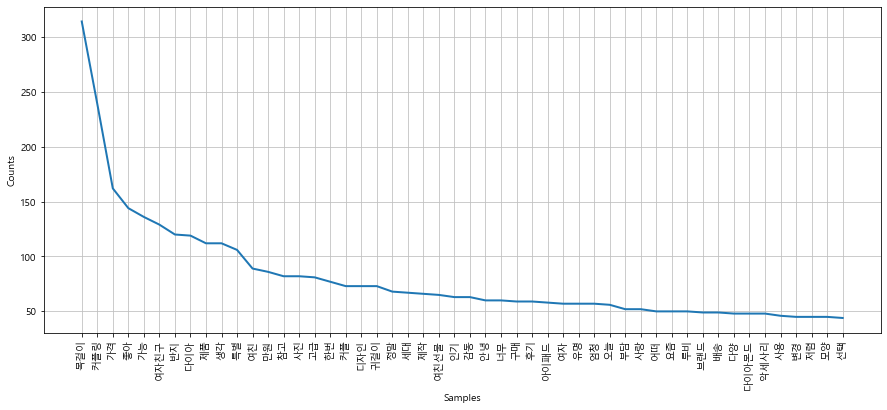

In [20]:
gf_gift = nltk.Text(gift_list, name="여친선물")
plt.figure(figsize=(15,6))
gf_gift.plot(50) # 많이 사용된 단어 50개 보여주기
plt.show()
# 한번더 돌렸더니 선물과 추천이 없어져 

In [19]:
# stop_list = ['선물', '추천'] # 1위2위단어였음에도 중요도 떨어져
stopwords = '가격 좋아 가능 여자친구 제품 생각 특별 여친 만원 참고 한번 고급 커플 선물 추천'
stop_list = stopwords.split()  # 매우좋은 표현
gift_list = [gift for gift in gift_list if gift not in stop_list]

In [16]:
gl = []
for gift in gift_list : 
    if gift not in stop_list:
        gl.append(gift)
gift_list = gl

###### 젼쳐처리가 먼저다, 샤람이 젼쳐리가, 상위레벨로 간다간다. 전전전세 .파워코딩파워코딩파워코딩팡팡팡팡파아

- Wordcloud 그리기

In [21]:
import numpy as np
from PIL import Image  #필 임포트 이미지
from wordcloud import WordCloud

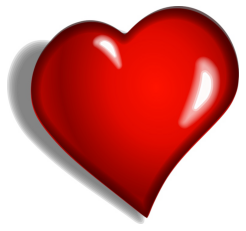

In [24]:
image = Image.open('data/heart.jpg') #dhdhdhdhdhdhdhddhdhhdhhdhdhhd
plt.imshow(image)
plt.axis('off')
plt.show()

In [26]:
data = gf_gift.vocab().most_common(300)  # 모스트 커먼? 보캡? 
data[:10]

[('목걸이', 314),
 ('커플링', 239),
 ('가격', 162),
 ('좋아', 144),
 ('가능', 136),
 ('여자친구', 129),
 ('반지', 120),
 ('다이아', 119),
 ('제품', 112),
 ('생각', 112)]

In [27]:
wc = WordCloud(
    font_path='c:/Windows/Fonts/malgun.ttf', 
    relative_scaling=0.2, background_color='white'
).generate_from_frequencies(dict(data))

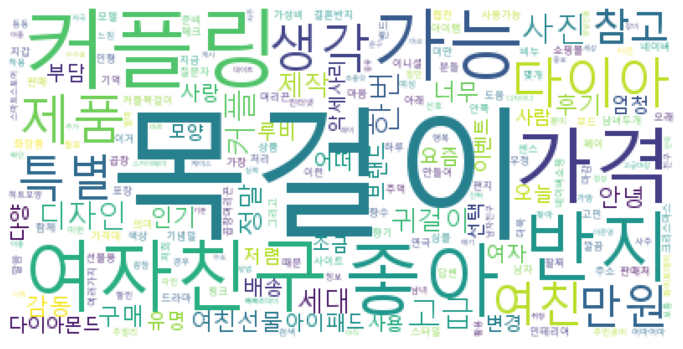

In [32]:
plt.figure(figsize=(12, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

- 하트 그림에 표시하기 

In [33]:
from wordcloud import ImageColorGenerator
mask = np.array(Image.open('data/heart.jpg'))
image_colors = ImageColorGenerator(mask)

In [34]:
wc = WordCloud(
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2, mask=mask,
    background_color='white'
).generate_from_frequencies(dict(data))
default_colors = wc.to_array()

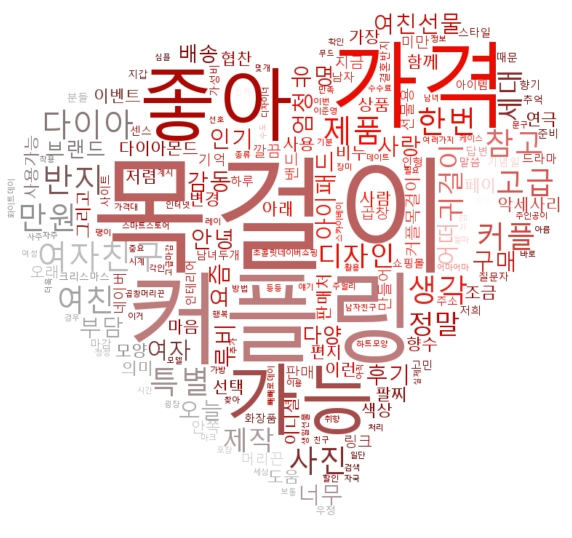

In [35]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
wc = WordCloud(
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.3, mask=mask,
    background_color='white',
    min_font_size=1, max_font_size=100
).generate_from_frequencies(dict(data))
default_colors = wc.to_array()

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()